<h1 style="text-align:center;">Laboratorio 3</h1>
<h4 style="text-align:center;">Cristopher Barrios</h4>
<h5 style="text-align:center;">18/8/2023</h5>

### Librerias

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Ejercicio 1

1. Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis 

In [60]:
# Se cargan los datos
digit = pd.read_csv("./data/train.csv")

In [61]:
# Primeras 5 filas
digit.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#Ultimas 5 filas
digit.tail(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#valor maximo de cada columna
digit.max()

label        9
pixel0       0
pixel1       0
pixel2       0
pixel3       0
            ..
pixel779    62
pixel780     0
pixel781     0
pixel782     0
pixel783     0
Length: 785, dtype: int64

In [64]:
#valor minimo de cada columna
digit.min()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [65]:
#tipo de dato de cada columna
digit.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [66]:
#Numero de filas y de columnas
digit.shape

(42000, 785)

In [67]:
#informacion del data
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [68]:
#valores faltantes
digit.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [69]:
# Crear la tabla de frecuencias
tabla_frecuencias = digit['label'].value_counts().reset_index()
tabla_frecuencias.columns = ['Valor', 'Frecuencia']
tabla_frecuencias

,Valor,Frecuencia
0,1,4684
1,7,4401
2,3,4351
3,9,4188
4,2,4177
5,6,4137
6,0,4132
7,4,4072
8,8,4063
9,5,3795


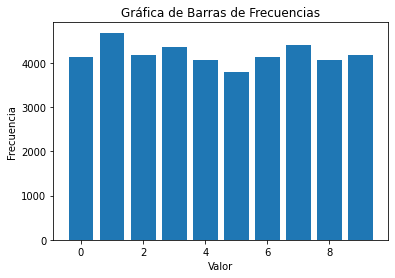

In [70]:
#Grafica de barras
plt.bar(tabla_frecuencias['Valor'], tabla_frecuencias['Frecuencia'])
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Gráfica de Barras de Frecuencias')
plt.show()

2. Haga un modelo de redes neuronales simple, determine la efectividad del modelo 

In [71]:
x = digit.to_numpy()[0:,1:].reshape(len(digit),28,28,1) 
y = digit.label.to_numpy()

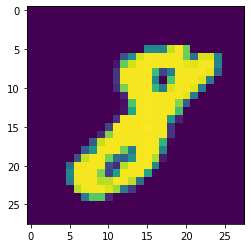

In [72]:
image = x[245]
plt.imshow(image.squeeze())

Epoch 1/5
1050/1050 [==============================] - 24s 22ms/step - loss: 0.3383 - accuracy: 0.9228 - val_loss: 0.0914 - val_accuracy: 0.9730
Epoch 2/5
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0812 - accuracy: 0.9755 - val_loss: 0.1246 - val_accuracy: 0.9654
Epoch 3/5
1050/1050 [==============================] - 23s 21ms/step - loss: 0.0561 - accuracy: 0.9826 - val_loss: 0.0551 - val_accuracy: 0.9842
Epoch 4/5
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.0518 - val_accuracy: 0.9849
Epoch 5/5
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0474 - val_accuracy: 0.9877
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                       

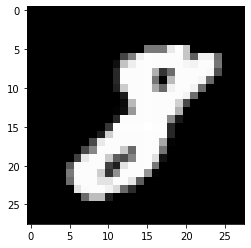

Etiqueta predicha: 8


In [73]:
# Definir el modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x, y, epochs=5, validation_split=0.2)

# Mostrar la arquitectura del modelo
model.summary()

# Visualizar una imagen de ejemplo
image = x[245]
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

# Predecir con el modelo
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)
print("Etiqueta predicha:", predicted_label)


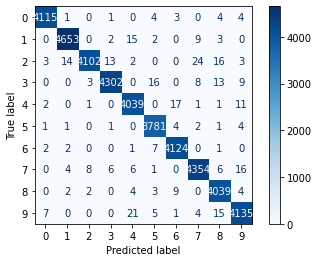

In [74]:
# Predecir con el modelo
prediction = model.predict(x)
predicted_labels = np.argmax(prediction, axis=1)

# Calcular la matriz de confusión
confusion = confusion_matrix(y, predicted_labels)

# Mostrar la matriz de confusión
classes = np.arange(10)  # Dígitos del 0 al 9
disp = ConfusionMatrixDisplay(confusion, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()


3. Haga un modelo de Deep learning, determine la efectividad del modelo 
4. Haga un modelo con cualquier otro algoritmo que el grupo seleccione, determine la efectividad 
del modelo. Puede basarse en los modelos que han sido probados con el data set que pueden 
encontrar en el siguiente link: http://yann.lecun.com/exdb/mnist/ 
5. Pruebe el mejor modelo ingresando imágenes de dígitos hechos a mano por los integrantes del 
grupo. Discuta el desempeño de su modelo y los resultados. 
6. Haga  un  informe  donde  incluya  el  análisis  exploratorio,  la  descripción  de  los  modelos,  la 
efectividad de cada uno y la comparación entre ellos. 

### Ejercicio 2


1. Utilice los conjuntos de entrenamiento y prueba de una de las series que utilizó en el Laboratorio 
2 
2. Haga al menos 2 modelos con configuraciones diferentes usando LSTM. Úselos para predecir. 
3. ¿Cuál predijo mejor?¿Son mejores que los modelos creados en el laboratorio pasado?¿Cómo lo 
determinaron?  
4. Agregue los resultados de este ejercicio al informe del ejercicio 1. 